# Spatial data analysis with python

For this example we will consider the distribution of hepatitis rates for the counties of California. The data are taken from the Department of Health Services of the State of California (1999). The rates are given as cases per 100,000 population, and are calculated by using 1998 data over the average population from 1995-1997.

In [1]:
#importing required libraries
import openpyxl
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import esda
from pysal.lib import weights
from splot.esda import moran_scatterplot,lisa_cluster,plot_local_autocorrelation
import geopandas as gpd
import scipy
import contextily as ctx
import pysal


In [3]:
#Check out the Data
from pandas import ExcelWriter
from pandas import ExcelFile
df = pd.read_excel('Hepatitis_rates.xlsx')
df.head()

,County,X,Y,Rate
0,Alameda,195,500,14.4
1,Alpine,318,560,0.0
2,Amador,265,550,12.1
3,Butte,220,630,52.9
4,Calaveras,280,530,22.6


In [4]:
#Index table on the county
df = df.set_index('County', drop=True)
df.head()

,X,Y,Rate
County,,,
Alameda,195,500,14.4
Alpine,318,560,0.0
Amador,265,550,12.1
Butte,220,630,52.9
Calaveras,280,530,22.6


In [5]:
#Display summary
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, Alameda  to Yuba 
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       58 non-null     object 
 1   Y       58 non-null     object 
 2   Rate    58 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.8+ KB


In [6]:
gpd.GeoDataFrame.crs

<AxesSubplot:xlabel='County'>

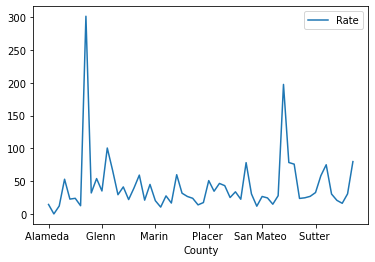

In [7]:
df.plot()

In [8]:
import plotly.express as px
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [9]:
df_geo= gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.X,df.Y))

In [10]:
df_geo

,X,Y,Rate,geometry
County,,,,
Alameda,195,500,14.4,POINT (195.000 500.000)
Alpine,318,560,0.0,POINT (318.000 560.000)
Amador,265,550,12.1,POINT (265.000 550.000)
Butte,220,630,52.9,POINT (220.000 630.000)
Calaveras,280,530,22.6,POINT (280.000 530.000)
Colusa,195,598,23.8,POINT (195.000 598.000)
Contra Costa,192,515,12.5,POINT (192.000 515.000)
Del Norte,100,790,301.5,POINT (100.000 790.000)
El Dorado,260,580,32.0,POINT (260.000 580.000)


In [11]:
w=weights.KNN.from_dataframe(df_geo,k=5)
w

In [12]:
#Row standardize the matrix
w.transform='R'

In [13]:
y=df["Rate"]

In [14]:
y.head()

County
Alameda       14.4
Alpine         0.0
Amador        12.1
Butte         52.9
Calaveras     22.6
Name: Rate, dtype: float64

In [15]:
df['lag']=weights.lag_spatial(w,y)
df.head()

,X,Y,Rate,geometry,lag
County,,,,,
Alameda,195,500,14.4,POINT (195.000 500.000),30.46
Alpine,318,560,0.0,POINT (318.000 560.000),27.64
Amador,265,550,12.1,POINT (265.000 550.000),35.80
Butte,220,630,52.9,POINT (220.000 630.000),37.00
Calaveras,280,530,22.6,POINT (280.000 530.000),18.02


In [16]:
mi=esda.Moran(df['lag'],w)
mi

In [17]:
mi.I

0.632806325855697

In [18]:
mi.p_sim

0.001

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Moran Scatterplot (0.63)'}, xlabel='Attribute', ylabel='Spatial Lag'>)

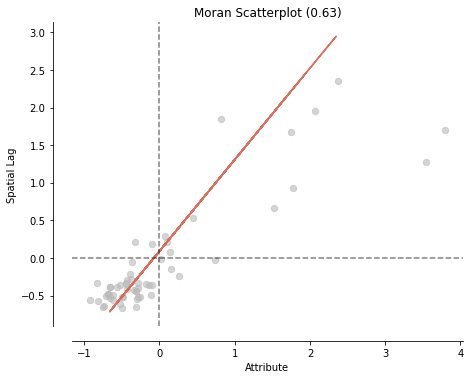

In [19]:
moran_scatterplot(mi)

In [20]:
lisa=esda.Moran_Local(df['lag'],w)

In [21]:
#Break observations into significant or not
df['significant'] = lisa.p_sim <0.05
#Store the quadrant they belong to
df['quadrant']=lisa.q

In [22]:
df.head()

,X,Y,Rate,geometry,lag,significant,quadrant
County,,,,,,,
Alameda,195,500,14.4,POINT (195.000 500.000),30.46,False,3
Alpine,318,560,0.0,POINT (318.000 560.000),27.64,False,3
Amador,265,550,12.1,POINT (265.000 550.000),35.80,False,3
Butte,220,630,52.9,POINT (220.000 630.000),37.00,False,2
Calaveras,280,530,22.6,POINT (280.000 530.000),18.02,True,3


In [23]:
df['significant']

County
Alameda             False
Alpine              False
Amador              False
Butte               False
Calaveras            True
Colusa              False
Contra Costa        False
Del Norte            True
El Dorado           False
Fresno              False
Glenn               False
Humboldt             True
Imperial            False
Inyo                False
Kern                False
Kings               False
Lake                False
Lassen               True
Los Angeles         False
Madera               True
Marin               False
Mariposa             True
Mendocino           False
Merced               True
Modoc                True
Mono                 True
Monterey            False
Napa                False
Nevada              False
Orange              False
Placer              False
Plumas              False
Riverside           False
Sacramento          False
San Benito          False
San Bernadino       False
San Diego           False
San Fransisco       False
San J

In [24]:
df['quadrant'].head()

County
Alameda       3
Alpine        3
Amador        3
Butte         2
Calaveras     3
Name: quadrant, dtype: int32

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

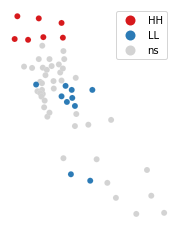

In [25]:
lisa_cluster(lisa,df_geo)